# CSV 文件

In [1]:
import pandas as pd 
import glob
import os 
import sys

input_file = 'data/foundations-for-analytics-with-python/supplier_data.csv'
output_file = 'data/foundations-for-analytics-with-python/pandas_output.csv'
data_frame = pd.read_csv(input_file)

## 读写csv文件

In [2]:
print(data_frame)
data_frame.to_csv(output_file, index=False)

   Supplier Name Invoice Number  Part Number     Cost Purchase Date
0     Supplier X       001-1001         2341  $500.00       1/20/14
1     Supplier X       001-1001         2341  $500.00       1/20/14
2     Supplier X       001-1001         5467  $750.00       1/20/14
3     Supplier X       001-1001         5467  $750.00       1/20/14
4     Supplier Y        50-9501         7009  $250.00       1/30/14
5     Supplier Y        50-9501         7009  $250.00       1/30/14
6     Supplier Y        50-9505         6650  $125.00        2/3/14
7     Supplier Y        50-9505         6650  $125.00        2/3/14
8     Supplier Z       920-4803         3321  $615.00        2/3/14
9     Supplier Z       920-4804         3321  $615.00       2/10/14
10    Supplier Z       920-4805         3321  $615.00       2/17/14
11    Supplier Z       920-4806         3321  $615.00       2/24/14


## 筛选特定行

### 行中的值满足某个条件

In [3]:
data_frame['Cost'] = data_frame['Cost'].str.strip('$').astype(float)
data_frame_value_meets_condition = data_frame.\
    loc[(data_frame['Supplier Name'].str.contains('Z')) | (data_frame['Cost'] > 600), :]
print(data_frame_value_meets_condition)
data_frame_value_meets_condition.to_csv(output_file, index=False)

   Supplier Name Invoice Number  Part Number   Cost Purchase Date
2     Supplier X       001-1001         5467  750.0       1/20/14
3     Supplier X       001-1001         5467  750.0       1/20/14
8     Supplier Z       920-4803         3321  615.0        2/3/14
9     Supplier Z       920-4804         3321  615.0       2/10/14
10    Supplier Z       920-4805         3321  615.0       2/17/14
11    Supplier Z       920-4806         3321  615.0       2/24/14


### 行中的值属于某个集合

In [4]:
important_dates = [
    '1/20/14', '1/30/14'
]
data_frame_value_in_set = data_frame.\
    loc[data_frame['Purchase Date'].isin(important_dates), :]
print(data_frame_value_in_set)
data_frame_value_in_set.to_csv(output_file, index=False)

  Supplier Name Invoice Number  Part Number   Cost Purchase Date
0    Supplier X       001-1001         2341  500.0       1/20/14
1    Supplier X       001-1001         2341  500.0       1/20/14
2    Supplier X       001-1001         5467  750.0       1/20/14
3    Supplier X       001-1001         5467  750.0       1/20/14
4    Supplier Y        50-9501         7009  250.0       1/30/14
5    Supplier Y        50-9501         7009  250.0       1/30/14


### 行中值匹配于某个模式/正则表达式

In [5]:
data_frame_value_matches_pattern = data_frame.\
    loc[data_frame['Invoice Number'].str.startswith('001-'), :]
print(data_frame_value_matches_pattern)
data_frame_value_matches_pattern.to_csv(output_file, index=False)

  Supplier Name Invoice Number  Part Number   Cost Purchase Date
0    Supplier X       001-1001         2341  500.0       1/20/14
1    Supplier X       001-1001         2341  500.0       1/20/14
2    Supplier X       001-1001         5467  750.0       1/20/14
3    Supplier X       001-1001         5467  750.0       1/20/14


## 选取特定的列

### 列索引值

In [6]:
data_frame_column_by_index = data_frame.iloc[0:4, [0, 3]]
print(data_frame_column_by_index)
data_frame_column_by_index.to_csv(output_file, index=False)

  Supplier Name   Cost
0    Supplier X  500.0
1    Supplier X  500.0
2    Supplier X  750.0
3    Supplier X  750.0


 ### 列标题

In [7]:
data_frame_column_by_name = data_frame.loc[:, ['Invoice Number', 'Purchase Date']]
print(data_frame_column_by_name)
data_frame_column_by_name.to_csv(output_file, index=False)

   Invoice Number Purchase Date
0        001-1001       1/20/14
1        001-1001       1/20/14
2        001-1001       1/20/14
3        001-1001       1/20/14
4         50-9501       1/30/14
5         50-9501       1/30/14
6         50-9505        2/3/14
7         50-9505        2/3/14
8        920-4803        2/3/14
9        920-4804       2/10/14
10       920-4805       2/17/14
11       920-4806       2/24/14


## 选取连续的行

In [8]:
input_file = 'data/foundations-for-analytics-with-python/supplier_data_unnecessary_header_footer.csv'
data_frame = pd.read_csv(input_file, header=None)
print(data_frame)
data_frame = data_frame.drop([0,1,2,16,17,18])
print(data_frame)
print(data_frame.iloc[0])
data_frame.columns= data_frame.iloc[0]
print(data_frame)
# data_frame = data_frame.index.drop(3)
# print(data_frame)
data_frame = data_frame.reindex(data_frame.index.drop(3))
print(data_frame)
data_frame.to_csv(output_file, index=False)

                               0               1            2         3  \
0    I don't care about this row             NaN          NaN       NaN   
1    I don't care about this row             NaN          NaN       NaN   
2    I don't care about this row             NaN          NaN       NaN   
3                  Supplier Name  Invoice Number  Part Number      Cost   
4                     Supplier X        001-1001         2341  $500.00    
5                     Supplier X        001-1001         2341  $500.00    
6                     Supplier X        001-1001         5467  $750.00    
7                     Supplier X        001-1001         5467  $750.00    
8                     Supplier Y         50-9501         7009  $250.00    
9                     Supplier Y         50-9501         7009  $250.00    
10                    Supplier Y         50-9505         6650  $125.00    
11                    Supplier Y         50-9505         6650  $125.00    
12                    Sup

## 添加标题行

In [9]:
input_file = 'data/foundations-for-analytics-with-python/supplier_data_no_header_row.csv'
header_list = [
    'Supplier Name', 'Invoice Number',
    'Part Number', 'Cost', 'Purchase Date'
]
data_frame = pd.read_csv(input_file, header=None, names = header_list)
print(data_frame)
data_frame.to_csv(output_file, index=False)

   Supplier Name Invoice Number  Part Number      Cost Purchase Date
0     Supplier X       001-1001         2341  $500.00      1/20/2014
1     Supplier X       001-1001         2341  $500.00      1/20/2014
2     Supplier X       001-1001         5467  $750.00      1/20/2014
3     Supplier X       001-1001         5467  $750.00      1/20/2014
4     Supplier Y        50-9501         7009  $250.00      1/30/2014
5     Supplier Y        50-9501         7009  $250.00      1/30/2014
6     Supplier Y        50-9505         6650  $125.00       2/3/2014
7     Supplier Y        50-9505         6650  $125.00       2/3/2014
8     Supplier Z       920-4803         3321  $615.00       2/3/2014
9     Supplier Z       920-4804         3321  $615.00      2/10/2014
10    Supplier Z       920-4805         3321  $615.00      2/17/2014
11    Supplier Z       920-4806         3321  $615.00      2/24/2014


## 从多个文件中连接数据

In [11]:
input_path = 'data/foundations-for-analytics-with-python'
all_files = glob.glob(os.path.join(input_path, 'sales_*csv'))
all_data_frame = []
for file in all_files:
    data_frame = pd.read_csv(file, index_col=None)
    all_data_frame.append(data_frame)
data_frame_concat = pd.concat(all_data_frame, axis = 0, ignore_index=True)
print(data_frame_concat)
data_frame_concat.to_csv(output_file, index=False)

    Customer ID       Customer Name Invoice Number Sale Amount Purchase Date
0          9876       Daniel Farber       100-0008   $1,115.00        2/2/14
1          8765         Laney Stone       100-0009   $1,367.00        2/8/14
2          7654        Roger Lipney       100-0010   $2,135.00       2/15/14
3          6543       Thomas Haines       100-0011   $1,346.00       2/17/14
4          5432         Anushka Vaz       100-0012   $1,560.00       2/21/14
5          4321      Harriet Cooper       100-0013   $1,852.00       2/25/14
6          1234          John Smith       100-0002   $1,200.00        1/1/14
7          2345       Mary Harrison       100-0003   $1,425.00        1/6/14
8          3456          Lucy Gomez       100-0004   $1,390.00       1/11/14
9          4567        Rupert Jones       100-0005   $1,257.00       1/18/14
10         5678       Jenny Walters       100-0006   $1,725.00       1/24/14
11         6789  Samantha Donaldson       100-0007   $1,995.00       1/31/14

## 计算每个文件中值的总和与均值

In [12]:
all_data_frames = []
for input_file in all_files:
    data_frame= pd.read_csv(input_file, index_col=None)
    total_cost = pd.DataFrame([float(str(value).strip('$').replace(',','')) \
                              for value in data_frame.loc[:, 'Sale Amount']]).sum()
    average_cost = pd.DataFrame([float(str(value).strip('$').replace(',', '')) \
                                for value in data_frame.loc[:, 'Sale Amount']]).mean()
    data = {
        'file_name': os.path.basename(input_file),
        'total_sales': total_cost,
        'average_sales': average_cost
    }
    all_data_frames.append(pd.DataFrame(data, 
        columns=['file_name', 'total_sales', 'average_sales']))
data_frames_concat = pd.concat(all_data_frames, axis=0, ignore_index=True)
print(data_frames_concat)
data_frames_concat.to_csv(output_file, index=False)

                 file_name  total_sales  average_sales
0  sales_february_2014.csv       9375.0    1562.500000
1   sales_january_2014.csv       8992.0    1498.666667
2     sales_march_2014.csv      10139.0    1689.833333


# Excel文件

## 内省 Excel 工作簿

In [2]:
#!/usr/bin/env python3
import sys
from xlrd import open_workbook, xldate_as_tuple
from xlwt import Workbook

input_file = 'data/foundations-for-analytics-with-python/sales_2013.xlsx'
input_path = 'data/foundations-for-analytics-with-python/'
output_file = 'data/foundations-for-analytics-with-python/2output.xls'

In [14]:
workbook = open_workbook(input_file)
print('Number of worksheets:', workbook.nsheets)
for worksheet in workbook.sheets():
    print("Worksheet name:", worksheet.name,
          '\tRows:', worksheet.nrows,
          '\tColumns:', worksheet.ncols)

Number of worksheets: 3
Worksheet name: january_2013 	Rows: 7 	Columns: 5
Worksheet name: february_2013 	Rows: 7 	Columns: 5
Worksheet name: march_2013 	Rows: 7 	Columns: 5


## 处理单个工作表

### 读写 Excel 文件

In [18]:
from datetime import date

output_workbook = Workbook()
output_worksheet = output_workbook.add_sheet('jan_2013_output')
with open_workbook(input_file) as workbook:
    worksheet = workbook.sheet_by_name('january_2013')
    for row_index in range(worksheet.nrows):
        row_list_output = []
        for col_index in range(worksheet.ncols):
            if worksheet.cell_type(row_index, col_index) == 3:
                date_cell = xldate_as_tuple(worksheet.cell_value(row_index, col_index), 
                                            workbook.datemode)
                date_cell = date(*date_cell[0:3]).strftime('%m/%d/%Y')
                row_list_output.append(date_cell)
                output_worksheet.write(row_index, col_index, date_cell)
            else:
                non_date_cell = worksheet.cell_value(row_index, col_index)
                row_list_output.append(non_date_cell)
                output_worksheet.write(
                    row_index, 
                    col_index, 
                    non_date_cell)
print(output_worksheet)
output_workbook.save(output_file)

In [20]:
output_file = 'data/foundations-for-analytics-with-python/pandas_output.xls'

data_frame = pd.read_excel(input_file, sheet_name='january_2013')
writer = pd.ExcelWriter(output_file)
data_frame.to_excel(writer, sheet_name='jan_13_output', index=False)
writer.save()

### 筛选特定行

#### 行中值满足某个条件

In [21]:
data_frame = pd.read_excel(input_file, 'january_2013', index_col=None)
data_frame_value_meets_condition = \
    data_frame[data_frame['Sale Amount'].astype(float)>1400.0]
writer = pd.ExcelWriter(output_file)
data_frame_value_meets_condition.to_excel(writer, sheet_name='jan_13_output', index=False)
writer.save()

#### 行中值属于某个集合

In [26]:
import_dates = ['01/24/2013', '01/31/2013']
data_frame = pd.read_excel(input_file, 'january_2013', index_col=None)
data_frame_value_in_set = data_frame[data_frame['Purchase Date'].isin(import_dates)]
writer = pd.ExcelWriter(output_file)
data_frame_value_in_set.to_excel(writer, sheet_name='jan_13_output', index=False)
writer.save()

#### 行中的值匹配于特定模式

In [29]:
data_frame = pd.read_excel(input_file, 'january_2013', index_col=None)
data_frame_value_matches_pattern = data_frame[data_frame['Customer Name'].str.startswith("J")]
writer = pd.ExcelWriter(output_file)
data_frame_value_matches_pattern.to_excel(writer, sheet_name='jan_13_output', index=False)
writer.save()

### 选取特定列

#### 列索引值

In [30]:
data_frame = pd.read_excel(input_file, 'january_2013', index_col=None)
data_frame_column_by_index = data_frame.iloc[:, [1, 4]]
writer = pd.ExcelWriter(output_file)
data_frame_column_by_index.to_excel(writer, sheet_name='jan_13_output', index=False)
writer.save()

#### 列标题

In [33]:
data_frame = pd.read_excel(input_file, 'january_2013', index_col=None)
data_frame_column_by_name = data_frame.loc[:, ['Customer ID', 'Purchase Date']]
writer = pd.ExcelWriter(output_file)
data_frame_column_by_name.to_excel(writer, sheet_name='jan_13_output', index=False)
writer.save()

## 读取工作簿中所有工作表

### 在所有工作表中筛选特定行

In [34]:
data_frame = pd.read_excel(input_file, sheet_name=None, index_col=None)
row_output = []
for worksheet_name, data in data_frame.items():
    row_output.append(data[data['Sale Amount'].astype(float)>2000.0])
filtered_rows = pd.concat(row_output, axis=0, ignore_index=True)
writer = pd.ExcelWriter(output_file)
filtered_rows.to_excel(writer, sheet_name='sale_amount_gt2000', index=False)
writer.save()

### 在所有工作表中选取特定列

In [35]:
data_frame = pd.read_excel(input_file, sheet_name=None, index_col=None)
column_output = []
for worksheet_name, data in data_frame.items():
    column_output.append(data.loc[:, ['Customer Name', 'Sale Amount']])
selected_columns = pd.concat(column_output, axis=0, ignore_index=True)
writer = pd.ExcelWriter(output_file)
selected_columns.to_excel(writer, sheet_name='selected_columns_all_worksheet', index=False)
writer.save()

## 在 Excel 工作簿中读取一组工作表

### 在一组工作表中筛选特定行

In [7]:
my_sheets = [0, 1]
threshold = 1900.0
data_frame = pd.read_excel(input_file, sheet_name=my_sheets, index_col=None)
row_list = []
for worksheet_name, data in data_frame.items():
    row_list.append(data[data['Sale Amount'].astype(float) > threshold])
filtered_rows = pd.concat(row_list, axis=0, ignore_index=True)
writer = pd.ExcelWriter(output_file)
filtered_rows.to_excel(writer, sheet_name='set_of_worksheets', index=False)
writer.save()

## 处理多个工作簿

### 工作表计数以及每个工作表中的行列计数

In [14]:
input_directory = 'data/foundations-for-analytics-with-python/'
workbook_counter = 0
for input_file in glob.glob(os.path.join(input_directory, '*.xls*')):
    workbook = open_workbook(input_file)
    print('Workbook: %s' % os.path.basename(input_file))
    print('Number of worksheets: %d' % workbook.nsheets)
    for worksheet in workbook.sheets():
        print('Worksheet name:', worksheet.name, '\tRows:', worksheet.nrows, '\tColumns:', worksheet.ncols)
    workbook_counter+=1
print('Number of Excel workbooks: %d' % (workbook_counter))

Workbook: 2output.xls
Number of worksheets: 1
Worksheet name: set_of_worksheets 	Rows: 3 	Columns: 5
Workbook: pandas_output.xls
Number of worksheets: 1
Worksheet name: selected_columns_all_worksheet 	Rows: 19 	Columns: 2
Workbook: sales_2013.xlsx
Number of worksheets: 3
Worksheet name: january_2013 	Rows: 7 	Columns: 5
Worksheet name: february_2013 	Rows: 7 	Columns: 5
Worksheet name: march_2013 	Rows: 7 	Columns: 5
Workbook: sales_2014.xlsx
Number of worksheets: 3
Worksheet name: january_2014 	Rows: 7 	Columns: 5
Worksheet name: february_2014 	Rows: 7 	Columns: 5
Worksheet name: march_2014 	Rows: 7 	Columns: 5
Workbook: sales_2015.xlsx
Number of worksheets: 3
Worksheet name: january_2015 	Rows: 7 	Columns: 5
Worksheet name: february_2015 	Rows: 7 	Columns: 5
Worksheet name: march_2015 	Rows: 7 	Columns: 5
Number of Excel workbooks: 5


### 从多个工作簿中连接数据

In [15]:
all_workbooks = glob.glob(os.path.join(input_path, '*.xls*'))
data_frames = []
for workbook in all_workbooks:
    all_worksheets = pd.read_excel(workbook, sheet_name=None, index_col=None)
    for worksheet_name, data in all_worksheets.items():
        data_frames.append(data)
all_data_concatenated = pd.concat(data_frames, axis=0, ignore_index=True)
writer = pd.ExcelWriter(output_file)
all_data_concatenated.to_excel(writer, sheet_name='all_data_all_workbooks', index=False)
writer.save()    

### 为每个工作簿和工作表计算总数和均值

In [3]:
all_workbooks = glob.glob(os.path.join(input_path, '*.xls*'))
print('all_workbooks: \n%s\n' % all_workbooks)

data_frames = []
for workbook in all_workbooks:
    all_worksheets = pd.read_excel(workbook, sheet_name=None, index_col=None)
    # print('all_worksheets: \n%s\n' % all_worksheets)
    
    workbook_total_sales = []
    workbook_number_of_sales = []
    worksheet_data_frames = []
    worksheets_data_frame = None
    workbook_data_frame = None
    for worksheet_name, data in all_worksheets.items():
        total_sales = pd.DataFrame([float(str(value).strip('$').replace(',', ''))\
            for value in data.loc[:, 'Sale Amount']], index=None).sum()
        print('total_sales: \n%s\n' % total_sales)
        
        number_of_sales = len(data.loc[:, 'Sale Amount'])
        print('number_of_sales: \n%s\n' % number_of_sales)
        
        average_sales = pd.Series(total_sales / number_of_sales)
        print('average_sales: \n%s\n' % average_sales)
        
        workbook_total_sales.append(total_sales)
        workbook_number_of_sales.append(number_of_sales)
        
        data = {
            'workbook': os.path.basename(workbook),
            'worksheet': worksheet_name,
            'worksheet_total': total_sales[0],
            'worksheet_average': average_sales[0]
        }
        print('data: \n%s\n' % data)
        
        worksheet_data_frame = pd.DataFrame(data, columns=[
            'workbook', 'worksheet', 'worksheet_total', 'worksheet_average'
        ], index=[0])
        print('worksheet_data_frame: \n%s\n' % worksheet_data_frame)
        
        worksheet_data_frames.append(worksheet_data_frame)
        print('worksheet_data_frames: \n%s\n' % worksheet_data_frames)

    worksheets_data_frame = pd.concat(worksheet_data_frames, axis=0, ignore_index=True)
    print('worksheets_data_frame: \n%s\n' % worksheets_data_frame)
    
    workbook_total = pd.DataFrame(workbook_total_sales).sum()
    print('workbook_total: \n%s\n' % workbook_total)
    
    workbook_total_number_of_sales = pd.DataFrame(workbook_number_of_sales).sum()
    print('workbook_total_number_of_sales: \n%s\n' % workbook_total_number_of_sales)
    
    workbook_average = pd.DataFrame(workbook_total / workbook_total_number_of_sales)
    print('workbook_average: \n%s\n' % workbook_average)
    
    workbook_stats = {
        'workbook': os.path.basename(workbook),
        'workbook_total': workbook_total[0],
        'workbook_average': workbook_average[0]
    }
    print('workbook_stats: \n%s\n' % workbook_stats)
    
    workbook_stats = pd.DataFrame(workbook_stats, columns=[
        'workbook', 'workbook_total', 'workbook_average'
    ], index=[0])
    print('workbook_stats: \n%s\n' % workbook_stats)
    
    workbook_data_frame = pd.merge(worksheets_data_frame, workbook_stats, on='workbook', how='left')
    print('workbook_data_frame: \n%s\n' % workbook_data_frame)

    data_frames.append(workbook_data_frame)
    print('data_frames: \n%s\n' % data_frames)

all_data_concatenated = pd.concat(data_frames, axis=0, ignore_index=True)
print('all_data_concatenated: \n%s\n' % all_data_concatenated)

writer = pd.ExcelWriter(output_file)
all_data_concatenated.to_excel(writer, sheet_name='sums_and_averages', index=False)
writer.save()

all_workbooks: 
['data/foundations-for-analytics-with-python\\pandas_output.xls', 'data/foundations-for-analytics-with-python\\sales_2013.xlsx', 'data/foundations-for-analytics-with-python\\sales_2014.xlsx', 'data/foundations-for-analytics-with-python\\sales_2015.xlsx']

total_sales: 
0    28506.0
dtype: float64

number_of_sales: 
18

average_sales: 
0    1583.666667
dtype: float64

data: 
{'workbook': 'pandas_output.xls', 'worksheet': 'selected_columns_all_worksheet', 'worksheet_total': 28506.0, 'worksheet_average': 1583.6666666666667}

worksheet_data_frame: 
            workbook                       worksheet  worksheet_total  \
0  pandas_output.xls  selected_columns_all_worksheet          28506.0   

   worksheet_average  
0        1583.666667  

worksheet_data_frames: 
[            workbook                       worksheet  worksheet_total  \
0  pandas_output.xls  selected_columns_all_worksheet          28506.0   

   worksheet_average  
0        1583.666667  ]

worksheets_data_fra

# 数据库

## Python内置的sqlite3模块

In [1]:
import sqlite3

In [2]:
#!/usr/bin/env python3
# 建库，建表
con = sqlite3.connect(':memory:')
query = '''create table sales(customer varchar(20), product varchar(40), amount float, date date);'''
con.execute(query)
con.commit()

In [4]:
# 插入几行数据
data = [
    ('Richard Lucas', 'Notepad', 2.50, '2014-01-02'),
    ('Jenny Kim', 'Binder', 4.15, '2014-01-15'),
    ('Svetlana Crow', 'Printer', 155.75, '2014-02-03'),
    ('Stephen Randolph', 'Computer', 679.40, '2014-02-20')
]
statement = "insert into sales values(?, ?, ?, ?)"
con.executemany(statement, data)
con.commit()

In [5]:
# 查询sales表
cursor = con.execute("select * from sales")
rows = cursor.fetchall()
print(rows)

[('Richard Lucas', 'Notepad', 2.5, '2014-01-02'), ('Jenny Kim', 'Binder', 4.15, '2014-01-15'), ('Svetlana Crow', 'Printer', 155.75, '2014-02-03'), ('Stephen Randolph', 'Computer', 679.4, '2014-02-20')]


In [7]:
row_counter = 0
for row in rows:
    print(row)
    row_counter += 1
print('Number of rows: %d' % (row_counter))

('Richard Lucas', 'Notepad', 2.5, '2014-01-02')
('Jenny Kim', 'Binder', 4.15, '2014-01-15')
('Svetlana Crow', 'Printer', 155.75, '2014-02-03')
('Stephen Randolph', 'Computer', 679.4, '2014-02-20')
Number of rows: 4


### 向表中插入新的记录

In [1]:
#!/usr/bin/env python3
import csv
import sqlite3
import sys
input_file = 'data/foundations-for-analytics-with-python/supplier_data.csv'
con = sqlite3.connect('data/foundations-for-analytics-with-python/Suppliers.db')
c = con.cursor()
create_table = '''
create table if not exists suppliers(
    supplier_name varchar(20),
    invoice_number varchar(20),
    part_number varchar(20),
    cost float,
    purchase_date date
);
'''
c.execute(create_table)
con.commit()

file_reader = csv.reader(open(input_file, 'r'), delimiter=',')
header = next(file_reader, None)
for row in file_reader:
    data = []
    for column_index in range(len(header)):
        data.append(row[column_index])
    print(data)
    c.execute('insert into suppliers values(?, ?, ?, ?, ?);', data)
con.commit()
print('')

output = c.execute('select * from suppliers')
rows = output.fetchall()
for row in rows:
    output = []
    for column_index in range(len(row)):
        output.append(str(row[column_index]))
    print(output)

['Supplier X', '001-1001', '2341', '$500.00', '1/20/14']
['Supplier X', '001-1001', '2341', '$500.00', '1/20/14']
['Supplier X', '001-1001', '5467', '$750.00', '1/20/14']
['Supplier X', '001-1001', '5467', '$750.00', '1/20/14']
['Supplier Y', '50-9501', '7009', '$250.00', '1/30/14']
['Supplier Y', '50-9501', '7009', '$250.00', '1/30/14']
['Supplier Y', '50-9505', '6650', '$125.00', '2/3/14']
['Supplier Y', '50-9505', '6650', '$125.00', '2/3/14']
['Supplier Z', '920-4803', '3321', '$615.00', '2/3/14']
['Supplier Z', '920-4804', '3321', '$615.00', '2/10/14']
['Supplier Z', '920-4805', '3321', '$615.00', '2/17/14']
['Supplier Z', '920-4806', '3321', '$615.00', '2/24/14']

['Supplier X', '001-1001', '2341', '$500.00', '1/20/14']
['Supplier X', '001-1001', '2341', '$500.00', '1/20/14']
['Supplier X', '001-1001', '5467', '$750.00', '1/20/14']
['Supplier X', '001-1001', '5467', '$750.00', '1/20/14']
['Supplier Y', '50-9501', '7009', '$250.00', '1/30/14']
['Supplier Y', '50-9501', '7009', '$25

### 更新表中记录

In [6]:
input_file = 'data/foundations-for-analytics-with-python/data_for_updating.csv'
con = sqlite3.connect(':memory:')
query = '''
    create table if not exists sales
    (
        customer varchar(20),
        product varchar(40),
        amount float,
        date date
    );
'''
con.execute(query)
con.commit()

data = [
    ('Richard Lucas', 'Notepad', 2.50, '2014-01-02'),
    ('Jenny Kim', 'Binder', 4.15, '2014-01-15'),
    ('Svetlana Crow', 'Printer', 155.75, '2014-02-03'),
    ('Stephen Randolph', 'Computer', 679.40, '2014-02-20')
]
for tuple in data:
    print(tuple)
print()
statement = 'insert into sales values(?, ?, ?, ?)'
con.executemany(statement, data)
con.commit()
file_reader = csv.reader(open(input_file, 'r'), delimiter=',')
header = next(file_reader, None)
for row in file_reader:
    data = []
    for column_index in range(len(header)):
        data.append(row[column_index])
    print(data)
    con.execute("update sales set amount=?, date=? where customer=?;", data)
con.commit()
print()

cursor = con.execute('select * from sales')
rows = cursor.fetchall()
for row in rows:
    output = []
    for column_index in range(len(row)):
        output.append(str(row[column_index]))
    print(output)

('Richard Lucas', 'Notepad', 2.5, '2014-01-02')
('Jenny Kim', 'Binder', 4.15, '2014-01-15')
('Svetlana Crow', 'Printer', 155.75, '2014-02-03')
('Stephen Randolph', 'Computer', 679.4, '2014-02-20')

['4.25', '5/11/2014', 'Richard Lucas']
['6.75', '5/12/2014', 'Jenny Kim']

['Richard Lucas', 'Notepad', '4.25', '5/11/2014']
['Jenny Kim', 'Binder', '6.75', '5/12/2014']
['Svetlana Crow', 'Printer', '155.75', '2014-02-03']
['Stephen Randolph', 'Computer', '679.4', '2014-02-20']


## MySQL数据库

In [2]:
import csv
import pymysql
import sys
from datetime import datetime, date

```sql
show databases;

create databases my_suppliers;

use my_suppliers;

CREATE TABLE IF NOT EXISTS Suppliers
(
    Supplier_Name VARCHAR(20),
    Invoice_Number VARCHAR(20),
    Part_Number VARCHAR(20),
    Cost FLOAT,
    Purchase_Date DATE
);

DESCRIBE Suppliers;

CREATE USER 'username'@'localhost' IDENTIFIED BY 'secret_password';
GRANT ALL PRIVILEGES ON my_suppliers.* TO 'username'@'localhost';
FLUSH PRIVILEGES;
```

### 向表中插入新记录

In [9]:
input_file = 'data/foundations-for-analytics-with-python/supplier_data.csv'
con = pymysql.connect(host='192.168.100.15', port=3306, db='my_suppliers', user='aurelius',passwd='999999')
c = con.cursor()
file_reader = csv.reader(open(input_file, 'r', newline=''))
header = next(file_reader)
for row in file_reader:
    data = []
    for column_index in range(len(header)):
        if column_index < 4:
            data.append(str(row[column_index]).lstrip('$').replace(',','').strip())
        else:
            a_date = datetime.date(datetime.strptime(str(row[column_index]), '%m/%d/%y'))
            a_date = a_date.strftime('%Y-%m-%d')
            data.append(a_date)
    print(data)
    c.execute('''insert into Suppliers values(%s, %s, %s, %s, %s);''', data)
con.commit()
print('')

c.execute('select * from Suppliers')
rows = c.fetchall()
for row in rows:
    row_list_output = []
    for column_index in range(len(row)):
        row_list_output.append(str(row[column_index]))
    print(row_list_output)

['Supplier X', '001-1001', '2341', '500.00', '2014-01-20']
['Supplier X', '001-1001', '2341', '500.00', '2014-01-20']
['Supplier X', '001-1001', '5467', '750.00', '2014-01-20']
['Supplier X', '001-1001', '5467', '750.00', '2014-01-20']
['Supplier Y', '50-9501', '7009', '250.00', '2014-01-30']
['Supplier Y', '50-9501', '7009', '250.00', '2014-01-30']
['Supplier Y', '50-9505', '6650', '125.00', '2014-02-03']
['Supplier Y', '50-9505', '6650', '125.00', '2014-02-03']
['Supplier Z', '920-4803', '3321', '615.00', '2014-02-03']
['Supplier Z', '920-4804', '3321', '615.00', '2014-02-10']
['Supplier Z', '920-4805', '3321', '615.00', '2014-02-17']
['Supplier Z', '920-4806', '3321', '615.00', '2014-02-24']

['Supplier X', '001-1001', '2341', '500.0', '2014-01-20']
['Supplier X', '001-1001', '2341', '500.0', '2014-01-20']
['Supplier X', '001-1001', '5467', '750.0', '2014-01-20']
['Supplier X', '001-1001', '5467', '750.0', '2014-01-20']
['Supplier Y', '50-9501', '7009', '250.0', '2014-01-30']
['Supp

### 查询一个表并将输出写入 csv 文件

In [12]:
output_file = 'data/foundations-for-analytics-with-python/5output.csv'
conn = pymysql.connect(host='192.168.100.15', port=3306, db='my_suppliers', user='aurelius', passwd='999999')
c = conn.cursor()
filewriter = csv.writer(open(output_file, 'w', newline=''), delimiter=',')
header = ['Supplier Name', 'Invoice Number', 'Part Number', 'Cost', 'Purchase Date']
filewriter.writerow(header)
c.execute('select * from Suppliers where Cost > 700.0;')
rows = c.fetchall()
for row in rows:
    filewriter.writerow(row)

### 更新表中记录

In [14]:
input_file = 'data/foundations-for-analytics-with-python/data_for_updating_mysql.csv'
conn = pymysql.connect(host='192.168.100.15', port=3306, db='my_suppliers', user='aurelius', passwd='999999')
c = conn.cursor()

file_reader = csv.reader(open(input_file, 'r', newline=''), delimiter=',')
header = next(file_reader, None)
for row in file_reader:
    data=[]
    for column_index in range(len(header)):
        data.append(str(row[column_index]).strip())
    print(data)
    c.execute('update Suppliers set Cost=%s, Purchase_Date=%s where Supplier_Name=%s;', data)
conn.commit()

c.execute('select * from Suppliers')
rows = c.fetchall()
for row in rows:
    output = []
    for column_index in range(len(row)):
        output.append(str(row[column_index]))
    print(output)

['600.00', '2014-01-22', 'Supplier X']
['200.00', '2014-02-01', 'Supplier Y']
['Supplier X', '001-1001', '2341', '600.0', '2014-01-22']
['Supplier X', '001-1001', '2341', '600.0', '2014-01-22']
['Supplier X', '001-1001', '5467', '600.0', '2014-01-22']
['Supplier X', '001-1001', '5467', '600.0', '2014-01-22']
['Supplier Y', '50-9501', '7009', '200.0', '2014-02-01']
['Supplier Y', '50-9501', '7009', '200.0', '2014-02-01']
['Supplier Y', '50-9505', '6650', '200.0', '2014-02-01']
['Supplier Y', '50-9505', '6650', '200.0', '2014-02-01']
['Supplier Z', '920-4803', '3321', '615.0', '2014-02-03']
['Supplier Z', '920-4804', '3321', '615.0', '2014-02-10']
['Supplier Z', '920-4805', '3321', '615.0', '2014-02-17']
['Supplier Z', '920-4806', '3321', '615.0', '2014-02-24']
['Supplier X', '001-1001', '2341', '600.0', '2014-01-22']
['Supplier X', '001-1001', '2341', '600.0', '2014-01-22']
['Supplier X', '001-1001', '5467', '600.0', '2014-01-22']
['Supplier X', '001-1001', '5467', '600.0', '2014-01-22'

# 应用程序

## 在一个大文件集合中查找一组项目

In [1]:
#!/usr/bin/env python3
import csv
import glob
import os
import sys
from datetime import date
from xlrd import open_workbook, xldate_as_tuple

item_numbers_file = 'data/foundations-for-analytics-with-python/item_numbers_to_find.csv'
path_to_folder = 'data/foundations-for-analytics-with-python/file_archive'
output_file = 'data/foundations-for-analytics-with-python/1app_output.csv'
item_numbers_to_find = []
with open(item_numbers_file, 'r', newline='') as item_numbers_csv_file:
    filereader = csv.reader(item_numbers_csv_file)
    for row in filereader:
        item_numbers_to_find.append(row[0])
# print(item_numbers_to_find)
filewriter = csv.writer(open(output_file, 'a', newline=''))
file_counter = 0
line_counter = 0
count_of_item_numbers = 0
for input_file in glob.glob(os.path.join(path_to_folder, '*.*')):
    file_counter += 1
    if input_file.split('.')[1]=='csv':
        with open(input_file, 'r', newline='') as csv_in_file:
            filereader = csv.reader(csv_in_file)
            header = next(filereader)
            for row in filereader:
                row_of_output = []
                for column in range(len(header)):
                    if column == 3:
                        cell_value = str(row[column]).lstrip('$').replace(',','').strip()                    
                    else:
                        cell_value = str(row[column]).strip()
                    row_of_output.append(cell_value)
                row_of_output.append(os.path.basename(input_file))
                if row[0] in item_numbers_to_find:
                    filewriter.writerow(row_of_output)
                    count_of_item_numbers += 1
                line_counter += 1
    elif input_file.split('.')[1] == 'xls' or input_file.split('.')[1] == 'xlsx':
        workbook = open_workbook(input_file)
        for worksheet in workbook.sheets():
            try:
                header = worksheet.row_values(0)
            except IndexError:
                pass
            for row in range(1, worksheet.nrows):
                row_of_output = []
                for column in range(len(header)):
                    if worksheet.cell_type(row, column) == 3:
                        cell_value = xldate_as_tuple(worksheet.cell(row, column).value, workbook.datemode)
                        cell_value = str(date(*cell_value[0:3])).strip()
                        row_of_output.append(cell_value)
                    else:
                        cell_value = str(worksheet.cell_value(row, column)).strip()
                        row_of_output.append(cell_value)
                row_of_output.append(os.path.basename(input_file))
                row_of_output.append(worksheet.name)
                if str(worksheet.cell(row, 0).value).split('.')[0].strip() in item_numbers_to_find:
                    filewriter.writerow(row_of_output)
                    count_of_item_numbers += 1
                line_counter += 1
print('Number of files:', file_counter)
print('Number of lines:', line_counter)
print('Number of item numbers:', count_of_item_numbers)

Number of files: 0
Number of lines: 0
Number of item numbers: 0


## 为CSV文件中数据的任意数目分类计算统计量

In [4]:
#!/usr/bin/env python3
import csv
import sys
from datetime import date, datetime

def date_diff(date1, date2):
    try:
        diff = str(datetime.strptime(date1, '%m/%d/%Y') - datetime.strptime(date2, '%m/%d/%Y')).split()[0]
    except:
        diff = 0        
    if diff == '0:00:00':
        diff = 0
    return diff

input_file = 'data/foundations-for-analytics-with-python/customer_category_history.csv'
output_file = 'data/foundations-for-analytics-with-python/2app_output.csv'
packages = { }
previous_name = 'N/A'
previous_package = 'N/A'
previous_package_date = 'N/A'
first_row = True
today = date.today().strftime('%m/%d/%Y')
with open(input_file, 'r', newline='') as input_csv_file:
    filereader = csv.reader(input_csv_file)
    header = next(filereader)
    for row in filereader:
        current_name = row[0]
        current_package = row[1]
        current_package_date = row[3]
        if current_name not in packages:
            packages[current_name] = { }
        if current_package not in packages[current_name]:
            packages[current_name][current_package] = 0
        if current_name != previous_name:
            if first_row:
                first_row = False
            else:
                diff = date_diff(today, previous_package_date)
                if previous_package not in packages[previous_name]:
                    packages[previous_name][previous_package] = int(diff)
                else:
                    packages[previous_name][previous_package] += int(diff)
        else:
            diff = date_diff(current_package_date, previous_package_date)
            packages[previous_name][previous_package] += int(diff)
        previous_name = current_name
        previous_package = current_package
        previous_package_date = current_package_date
header = ['Customer Name', 'Category', 'Total Time (in Days)']
with open(output_file, 'w', newline='') as output_csv_file:
    filewriter = csv.writer(output_csv_file)
    filewriter.writerow(header)
    for customer_name, customer_name_value in packages.items():
        for package_category, package_category_value in packages[customer_name].items():
            row_of_output = [ ]
            print(customer_name, package_category, package_category_value)
            row_of_output.append(customer_name)
            row_of_output.append(package_category)
            row_of_output.append(package_category_value)
            filewriter.writerow(row_of_output)

John Smith Bronze 70
John Smith Silver 39
John Smith Gold 2171
Mary Yu Silver 72
Mary Yu Gold 2196
Wayne Thompson Bronze 167
Wayne Thompson Silver 2122
Bruce Johnson Bronze 77
Bruce Johnson Silver 60
Bruce Johnson Gold 2125
Annie Lee Bronze 26
Annie Lee Silver 44
Annie Lee Gold 2157
Priya Patel Silver 99
Priya Patel Gold 54


## 为文本文件中数据的任意数目分类计算统计量

In [5]:
#!/usr/bin/env python3
import sys
input_file = 'data/foundations-for-analytics-with-python/mysql_server_error_log.txt'
output_file = 'data/foundations-for-analytics-with-python/3app_output.csv'
messages = { }
notes = [ ]
with open(input_file, 'r', newline='') as text_file:
    for row in text_file:
        if '[Note]' in row:
            row_list = row.split(' ', 4)
            day = row_list[0].strip()
            note = row_list[4].strip('\n').strip()
            if note not in notes:
                notes.append(note)
            if day not in messages:
                messages[day] = { }
            if note not in messages[day]:
                messages[day][note] = 1
            else:
                messages[day][note] += 1
filewriter = open(output_file, 'w', newline='')
header = ['Date']
header.extend(notes)
header = ','.join(map(str,header)) + '\n'
print(header)
filewriter.write(header)
for day, day_value in messages.items():
    row_of_output = [ ]
    row_of_output.append(day)
    for index in range(len(notes)):
        if notes[index] in day_value.keys():
            row_of_output.append(day_value[notes[index]])
        else:
            row_of_output.append(0)
    output = ','.join(map(str,row_of_output)) + '\n'
    print(output)
    filewriter.write(output)
filewriter.close()

Date,InnoDB: Compressed tables use zlib 1.2.3,InnoDB: Using atomics to ref count buffer pool pages,InnoDB: 5.6.16 started; log sequence number 1234567,/usr/local/mysql/bin/mysqld: Shutdown complete,InnoDB: Completed initialization of buffer pool,InnoDB: IPv6 is available.

2014-02-03,2,2,1,1,0,0

2014-03-07,3,1,1,1,0,0

2014-10-27,0,0,1,1,2,2



# 图与图表

## matplotlib

### 条形图

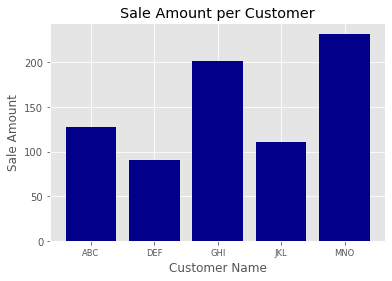

In [16]:
#!/usr/bin/env python3
import matplotlib.pyplot as plt
# 使用ggplot 样式表来模拟ggplot2 风格的图形，ggplot2 是一个常用的R 语言绘图包
plt.style.use('ggplot')
# 条形图的准备数据
customers = ['ABC', 'DEF', 'GHI', 'JKL', 'MNO']
customers_index = range(len(customers))
sale_amounts = [127, 90, 201, 111, 232]

# 使用matplotlib 绘图时，首先要创建一个基础图，然后在基础图中创建一个或多个子图
# 创建一个基础图
fig = plt.figure()
# 添加一个子图
# 1, 1, 1 表示创建1 行1 列的子图，并使用第1 个也是唯一的一个子图
ax1 = fig.add_subplot(1,1,1)
# 创建条形图
# customer_index 设置条形左侧在x 轴上的坐标
# sale_amounts 设置条形的高度
# align='center' 设置条形与标签中间对齐
# color='darkblue' 设置条形的颜色
ax1.bar(customers_index, sale_amounts, align='center', color='darkblue')
# 设置刻度线位置在x 轴底部和y 轴左侧，使图形的上部和右侧不显示刻度线
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
# 将条形的刻度线标签由客户索引值更改为实际的客户名称
# rotation=0 表示刻度标签应该是水平的，而不是倾斜一个角度
# fontsize='small' 将刻度标签的字体设为小字体
plt.xticks(customers_index, customers, rotation=0, fontsize='small')
# 向图中添加x 轴标签、y 轴标签和图形标题
plt.xlabel('Customer Name')
plt.ylabel('Sale Amount')
plt.title('Sale Amount per Customer')
# 将统计图保存在当前文件夹
# dpi=400 设置图形分辨率 [ 每英寸（1 英寸=2.54 厘米）的点数）]
# bbox_inches='tight' 表示在保存图形时，将图形四周的空白部分去掉。
plt.savefig('data/foundations-for-analytics-with-python/bar_plot.png', dpi=400, bbox_inches='tight')
# 在一个新窗口中显示统计图
plt.show()

### 直方图

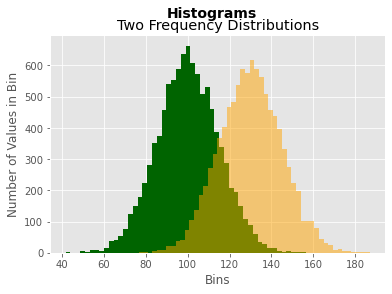

In [15]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
mu1, mu2, sigma = 100, 130, 15
# 随机数生成器创建两个正态分布变量x1 和x2
# x1 的均值是100，x2 的均值是130
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
# 创建两个柱形图，或称频率分布图
# bins=50 表示每个变量的值应该被分成50 份
# normed=False 表示直方图显示的是频率分布，而不是概率密度
# 第一个直方图是暗绿色，第二个直方图是橙色
# alpha=0.5 表示第二个直方图应该是透明的
n, bins, patches = ax1.hist(x1, bins=50, color='darkgreen')
n, bins, patches = ax1.hist(x2, bins=50, color='orange', alpha=0.5)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
# 为基础图添加一个居中的标题，字体大小为14，粗体
fig.suptitle('Histograms', fontsize=14, fontweight='bold')
# 为子图添加一个居中的标题，位于基础图标题下面
ax1.set_title('Two Frequency Distributions')
plt.savefig('data/foundations-for-analytics-with-python/histogram.png', dpi=400, bbox_inches='tight')
plt.show()

### 折线图

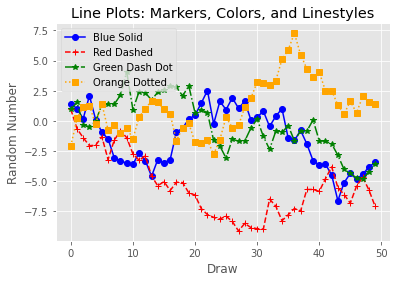

In [17]:
#!/usr/bin/env python3
from numpy.random import randn
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# 创建绘图所用的随机数据
plot_data1 = randn(50).cumsum()
plot_data2 = randn(50).cumsum()
plot_data3 = randn(50).cumsum()
plot_data4 = randn(50).cumsum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
# 创建4 条折线
# 使用不同的数据点类型、颜色和线型
# label 参数保证折线在图例中可以正确标记
ax1.plot(plot_data1, marker=r'o', color=u'blue', linestyle='-', label='Blue Solid')
ax1.plot(plot_data2, marker=r'+', color=u'red', linestyle='--', label='Red Dashed')
ax1.plot(plot_data3, marker=r'*', color=u'green', linestyle='-.', label='Green Dash Dot')
ax1.plot(plot_data4, marker=r's', color=u'orange', linestyle=':', label='Orange Dotted')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.set_title('Line Plots: Markers, Colors, and Linestyles')
plt.xlabel('Draw')
plt.ylabel('Random Number')
# 为统计图创建图例
# loc='best' 指示matplotlib 根据图中的空白部分将图例放在最合适的位置
plt.legend(loc='best')
plt.savefig('data/foundations-for-analytics-with-python/line_plot.png', dpi=400, bbox_inches='tight')
plt.show()

### 散点图

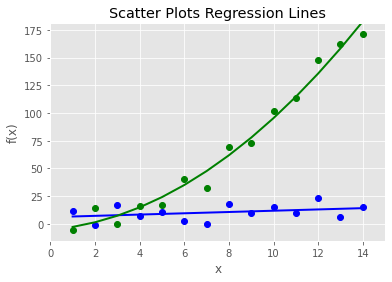

In [24]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
x = np.arange(start=1., stop=15., step=1.)
# 通过随机数使数据与一条直线和一条二次曲线稍稍偏离
y_linear = x + 5. * np.random.randn(14)
y_quadratic = x**2 + 10. * np.random.randn(14)
# 使用numpy 的polyfit 函数通过两组数据点(x, y_linear) 和(x, y_quadratic) 拟合出一条直线和一条二次曲线
# 使用poly1d 函数根据直线和二次曲线的参数生成一个线形方程和二次方程
fn_linear = np.poly1d(np.polyfit(x, y_linear, deg=1))
fn_quadratic = np.poly1d(np.polyfit(x, y_quadratic, deg=2))
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
# 创建带有两条回归曲线的散点图
# 'bo' 表示(x, y_linear）点是蓝色圆圈
# 'go' 表示(x, y_quadratic) 点是绿色圆圈
# 'b-' 表示(x, y_linear) 点之间的线是一条蓝色实线
# 'g-' 表示(x, y_quadratic) 点之间的线是一条绿色实线
# linewidth 可以设置线的宽度
ax1.plot(x, y_linear, 'bo', x, y_quadratic, 'go', x, fn_linear(x), 'b-', x, fn_quadratic(x), 'g-', linewidth=2.)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.set_title('Scatter Plots Regression Lines')
plt.xlabel('x')
plt.ylabel('f(x)')
# 设置x 轴和y 轴的范围
# 两条曲线使用min 和max 函数基于实际数据设置坐标轴范围
# 可以使用具体的数值设置范围，例如xlim(0, 20) 和ylim(0, 200)
plt.xlim((min(x)-1., max(x)+1.))
plt.ylim((min(y_quadratic)-10., max(y_quadratic)+10.))
plt.savefig('data/foundations-for-analytics-with-python/scatter_plot.png', dpi=400, bbox_inches='tight')
plt.show()

### 箱式图

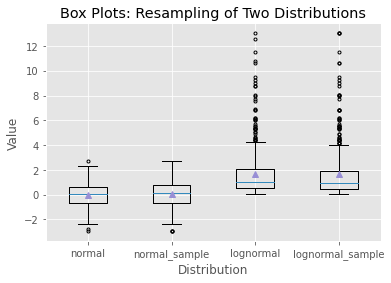

In [27]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
N = 500
normal = np.random.normal(loc=0.0, scale=1.0, size=N)
lognormal = np.random.lognormal(mean=0.0, sigma=1.0, size=N)
index_value = np.random.random_integers(low=0, high=N-1, size=N)
normal_sample = normal[index_value]
lognormal_sample = lognormal[index_value]
box_plot_data = [normal, normal_sample, lognormal, lognormal_sample]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
# 创建一个列表box_labels，里面保存着每个箱线图的标签
box_labels = ['normal', 'normal_sample', 'lognormal', 'lognormal_sample']
# 使用boxplot 函数创建4 个箱线图
# notch=False 表示箱体是矩形，而不是在中间收缩
# sym='.' 表示离群点（就是直线之外的点）使用圆点，而不是默认的+ 符号
# vert=True 表示箱体是垂直的，不是水平的
# whis=1.5 设定了直线从第一四分位数和第三四分位数延伸出的范围（例如：Q3+whis*IQR，IQR 就是四分位距，等于Q3-Q1）
# showmeans=True 表示箱体在显示中位数的同时也显示均值
# labels=box_labels 表示使用box_labels 中的值来标记箱线图
ax1.boxplot(box_plot_data, notch=False, sym='.', vert=True, whis=1.5, showmeans=True, labels=box_labels)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.set_title('Box Plots: Resampling of Two Distributions')
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Value')
plt.savefig('data/foundations-for-analytics-with-python/box_plot.png', dpi=400, bbox_inches='tight')
plt.show()

## pandas

Metrics     Metric 1  Metric 2  Metric 3
Customer 1  0.653573  0.556866  0.880698
Customer 2  0.490744  0.816417  0.600826
Customer 3  0.608498  0.759853  0.983666
Customer 4  0.622589  0.763866  0.109379
Customer 5  0.816975  0.151131  0.783799


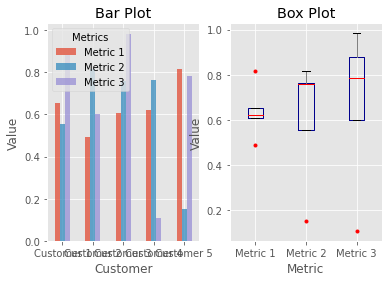

In [32]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# 创建一个基础图和两个并排放置的子图
fig, axes = plt.subplots(nrows=1, ncols=2)
# 使用ravel 函数将两个子图分别赋给两个变量ax1 和ax2
# 这样就不必使用行和列的索引（例如，axes[0,0]和axes[0,1]）来引用子图
ax1, ax2 = axes.ravel()
data_frame = pd.DataFrame(np.random.rand(5, 3), index=['Customer 1', 'Customer 2', 'Customer 3', 'Customer 4', 'Customer 5'], columns=pd.Index(['Metric 1', 'Metric 2', 'Metric 3'], name='Metrics'))
print(data_frame)
# 使用pandas 的plot 函数在左侧子图中创建一个条形图
data_frame.plot(kind='bar', ax=ax1, alpha=0.75, title='Bar Plot')
# 使用matplotlib 的函数来设置x 轴和y 轴标签的旋转角度和字体大小
plt.setp(ax1.get_xticklabels(), rotation=45, fontsize=10)
plt.setp(ax1.get_xticklabels(), rotation=0, fontsize=10)
ax1.set_xlabel('Customer')
ax1.set_ylabel('Value')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
# 为箱线图单独创建一个颜色字典
colors = dict(boxes='DarkBlue', whiskers='Gray', medians='Red', caps='Black')
# 在右侧子图中创建一个箱线图，使用colors 变量为箱线图各部分着色，并将离群点的形状设置为红色圆点
data_frame.plot(kind='box', color=colors, sym='r.', ax=ax2, title='Box Plot')
plt.setp(ax2.get_xticklabels(), rotation=45, fontsize=10)
plt.setp(ax2.get_xticklabels(), rotation=0, fontsize=10)
ax2.set_xlabel('Metric')
ax2.set_ylabel('Value')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
plt.savefig('data/foundations-for-analytics-with-python/pandas_plots.png', dpi=400, bbox_inches='tight')
plt.show()

## seaborn

[seaborn 文档](http://stanford.edu/~mwaskom/software/seaborn/index.html)

data: 
[[ 4.62977425 11.23785501]
 [ 5.07640306  9.70829039]
 [ 3.55739049 11.00095703]
 [ 3.79793352  8.84234582]
 [ 5.78676931 10.32542742]
 [ 4.9373497   9.87594399]
 [ 5.69879618 10.68125728]
 [ 5.21856862 10.22237043]
 [ 4.93165787  9.9174363 ]
 [ 4.20177067  7.83252504]
 [ 4.06008895  8.93946965]
 [ 3.82008223  9.59756767]
 [ 5.75976308 10.86249752]
 [ 5.05273152 10.27641204]
 [ 5.01487721 11.25364484]
 [ 4.98458597  9.74489895]
 [ 5.94186884 11.42363074]
 [ 4.52525506  9.54292499]
 [ 4.15613926  9.36395761]
 [ 3.65613004 10.41568116]
 [ 5.72817238 10.07985506]
 [ 4.62767678  9.99287897]
 [ 5.25770498  9.48666987]
 [ 4.20700445  8.37004501]
 [ 5.56443107 10.85200291]
 [ 3.49693522 10.0683192 ]
 [ 3.89802121 10.12732497]
 [ 5.28441856 10.83758845]
 [ 6.2705039   9.40355181]
 [ 4.34501385  9.50054525]
 [ 5.57474934 11.22313931]
 [ 5.04322223  9.98049198]
 [ 5.66182889  9.49152751]
 [ 5.51307346 10.16085864]
 [ 3.51666524  8.39319536]
 [ 5.52292043 10.05840863]
 [ 6.15510196 10.0373

d:\workspace\venvs\notebook\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
d:\workspace\venvs\notebook\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


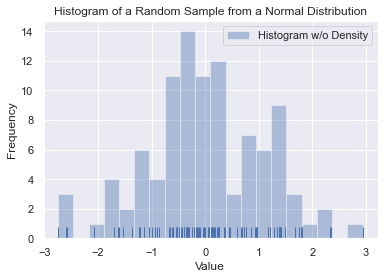

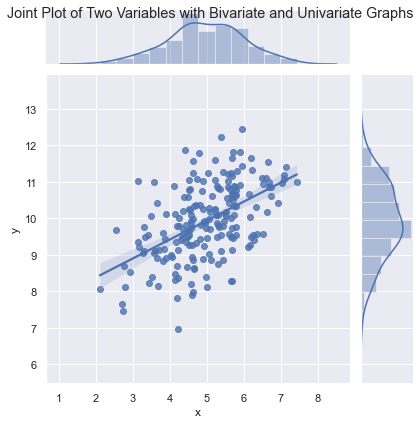

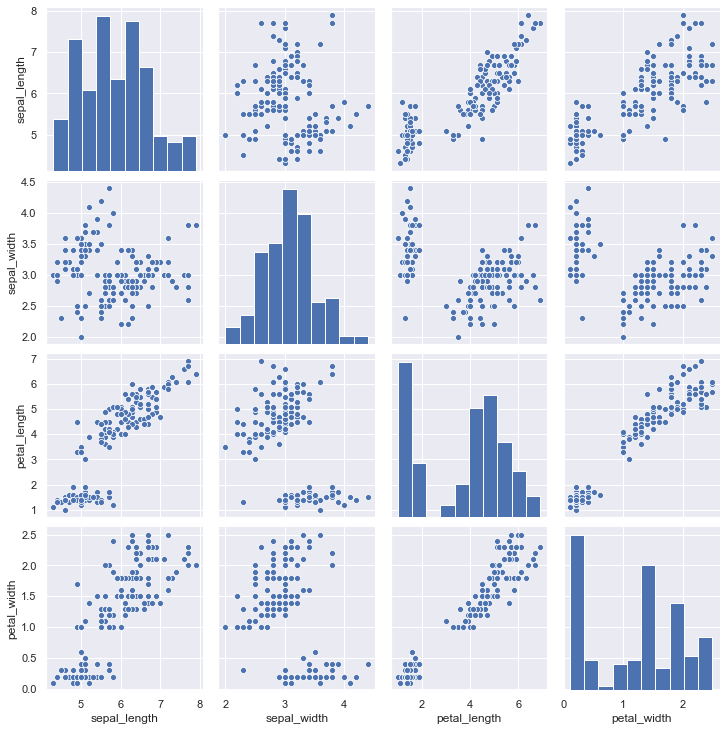

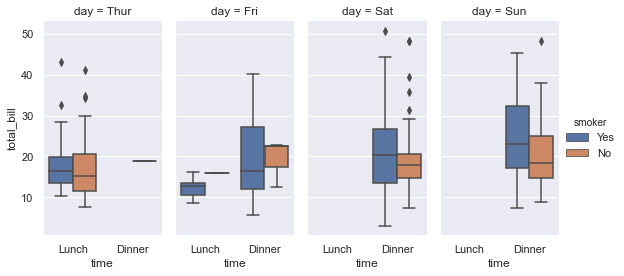

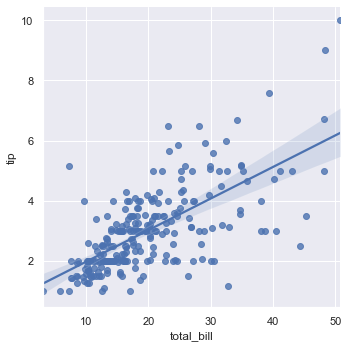

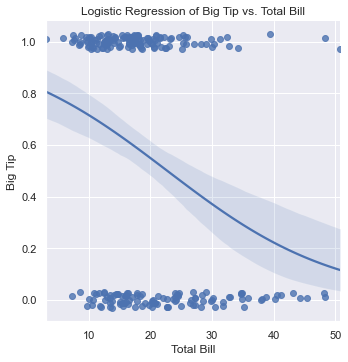

<Figure size 432x288 with 0 Axes>

In [1]:
#!/usr/bin/env python3
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
sns.set(color_codes=True)

x = np.random.normal(size=100)
# bins 设置包括数据封箱个数
# kde 是否显示高斯核密度估计
# rug 在支撑轴上显示地毯图
# label 创建坐标轴标签和标题
sns.distplot(x, bins=20, kde=False, rug=True, label="Histogram w/o Density")
sns.utils.axlabel("Value", "Frequency")
plt.title("Histogram of a Random Sample from a Normal Distribution")
plt.legend()

# 带有回归直线的散点图与单变量直方图
mean, cov = [5, 10], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
print('data: \n%s\n' % data)
data_frame = pd.DataFrame(data, columns=["x", "y"])
print('data_frame: \n%s\n' % data_frame)
# 使用jointplot 函数显示两个变量的一张散点图，其中带有一条回归直线，并为每个变量生成一张直方图
sns.jointplot(x="x", y="y", data=data_frame, kind="reg").set_axis_labels("x", "y")
plt.suptitle("Joint Plot of Two Variables with Bivariate and Univariate Graphs")

iris = sns.load_dataset("iris")
# 使用pairplot 函数生成数据集中每两个变量之间的双变量散点图，并为每个变量生成一张直方图
sns.pairplot(iris)

tips = sns.load_dataset("tips")
# 使用factorplot 函数生成的箱线图，表示两个变量之间的关系，对于第三个变量的每一个值都有一张箱线图，并按另一个变量分类
sns.factorplot(x="time", y="total_bill", hue="smoker",col="day", data=tips, kind="box", size=4, aspect=.5)

# 使用lmplot 函数生成的一张散点图和一个线性回归模型，并在回归直线周围显示了置信区间
sns.lmplot(x="total_bill", y="tip", data=tips)

# 带有bootstrap置信区间的逻辑斯蒂回归模型
# 使用lmplot 函数为一个二值因变量生成的一个逻辑斯蒂回归模型
# 函数使用y_jitter 参数使数据点在1 和0 处轻微振动，这样可以更清楚地看出数据点沿着x 轴的聚集情况。
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips, logistic=True, y_jitter=.03).set_axis_labels("Total Bill", "Big Tip")
plt.title("Logistic Regression of Big Tip vs. Total Bill")
plt.show()
savefig("data/foundations-for-analytics-with-python/seaborn_plots.png")

# 描述性统计与建模

## 葡萄酒质量

In [1]:
#!/usr/bin/env python3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm
# 将数据集读入到pandas数据框中
# sep 表示域分隔符为逗号
# header=0 第一行为列标题
wine = pd.read_csv('data/foundations-for-analytics-with-python/winequality-both.csv', sep=',', header=0)
wine.columns = wine.columns.str.replace(' ', '_')
print('head: \n%s\n' % wine.head())

head: 
  type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65    

In [2]:
# 显示所有变量的描述性统计量
# 这些统计量包括总数、均值、标准差、最小值、第25 个百分位数、中位数、第75 个百分位数和最大值
print('describe: \n%s\n' % wine.describe())

describe: 
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.0000

In [3]:
# 找出唯一值，输出显示质量列中的唯一值是3、4、5、6、7、8 和9
print('quality.unique: \n%s\n' % sorted(wine.quality.unique()))

quality.unique: 
[3, 4, 5, 6, 7, 8, 9]



In [5]:
# 计算值的频率
print('quality.value_counts: \n%s\n' % wine.quality.value_counts())

quality.value_counts: 
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64



## 分组、直方图与t 检验

In [6]:
# 按照葡萄酒类型显示质量的描述性统计量
# unstack 函数将结果重新排列，这样红葡萄酒和白葡萄酒的统计量就会显示在并排的两列中
print(wine.groupby('type')[['quality']].describe().unstack('type'))

type 
quality  count  red      1599.000000
                white    4898.000000
         mean   red         5.636023
                white       5.877909
         std    red         0.807569
                white       0.885639
         min    red         3.000000
                white       3.000000
         25%    red         5.000000
                white       5.000000
         50%    red         6.000000
                white       6.000000
         75%    red         6.000000
                white       6.000000
         max    red         8.000000
                white       9.000000
dtype: float64


In [7]:
# 按照葡萄酒类型显示质量的特定分位数值
# 对质量列计算第25 百分位数和第75 百分位数
print(wine.groupby('type')[['quality']].quantile([0.25, 0.75]).unstack('type'))

quality      
type     red white
0.25     5.0   5.0
0.75     6.0   6.0


In [8]:
# 按照葡萄酒类型查看质量分布
red_wine = wine.loc[wine['type']=='red', 'quality']
print('red_wine: \n%s\n' % red_wine)

red_wine: 
0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64



In [9]:
white_wine = wine.loc[wine['type']=='white', 'quality']
print('white_wine: \n%s\n' % white_wine)

white_wine: 
1599    6
1600    6
1601    6
1602    6
1603    6
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 4898, dtype: int64



AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


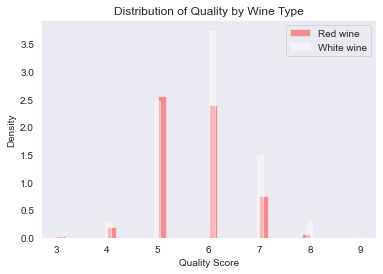

In [15]:
sns.set_style("dark")
print(sns.distplot(red_wine, norm_hist=True, kde=False, color="red", label="Red wine"))
print(sns.distplot(white_wine, norm_hist=True, kde=False, color="white", label="White wine"))
sns.utils.axlabel("Quality Score", "Density")
plt.title("Distribution of Quality by Wine Type")
plt.legend()
plt.show()

In [16]:
# 检验红葡萄酒和白葡萄酒的平均质量是否有所不同
print(wine.groupby(['type'])[['quality']].agg(['std']))

tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)

print('tstat: %.3f pvalue: %.4f' % (tstat, pvalue))

quality
            std
type           
red    0.807569
white  0.885639
tstat: -9.686 pvalue: 0.0000


### 成对变量之间的关系和相关性

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity              -0.111981   

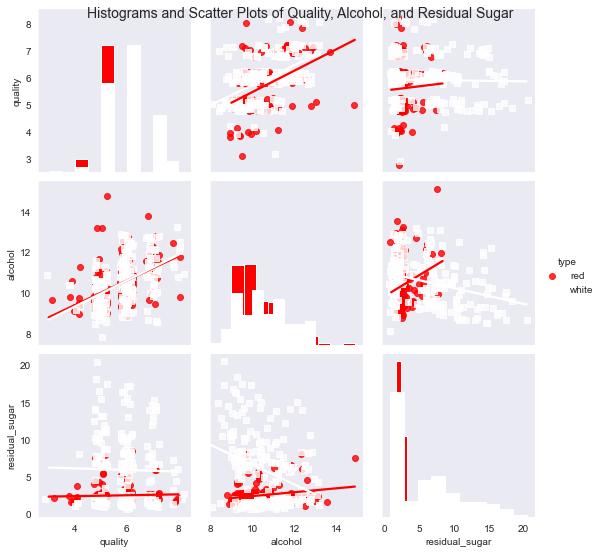

In [5]:
# print(wine)
# corr 函数计算所有变量的相关矩阵
print(wine.corr())
# 从红葡萄酒和白葡萄酒的数据中取出一个“小”样本来进行绘图
def take_sample(data_frame, replace=False, n=200):
    return data_frame.loc[np.random.choice(data_frame.index, replace=replace, size=n)]

reds_sample = take_sample(wine.loc[wine['type']=='red', :])
whites_sample = take_sample(wine.loc[wine['type']=='white', :])
wine_sample = pd.concat([reds_sample, whites_sample])
# 根据索引值是否在抽样数据的索引值中分别设为1 和0
wine['in_sample'] = np.where(wine.index.isin(wine_sample.index), 1.,0.)
# 使用pandas 的crosstab 函数来确认in_sample 列中包含400 个1（200 条红葡萄酒数据和200 条白葡萄酒数据）和6097 个0
print(pd.crosstab(wine.in_sample, wine.type, margins=True))

# 查看成对变量之间的关系
sns.set_style("dark")
# seaborn 的pairplot 函数创建一个统计图矩阵
# 主对角线上的图以直方图或密度图的形式显示了每个变量的单变量分布
# 对角线之外的图以散点图的形式显示了每两个变量之间的双变量分布，散点图中可以有回归直线，也可以没有
g = sns.pairplot(
    wine_sample,
    kind='reg', 
    plot_kws=
    {
        "ci": False, "x_jitter": 0.25, "y_jitter": 0.25
    }, 
    hue='type', 
    diag_kind='hist', 
    diag_kws=
    {
        "bins": 10, "alpha": 1.0
    }, 
    palette=dict(red="red", white="white"), 
    markers=["o", "s"], 
    vars=['quality', 'alcohol', 'residual_sugar']
)
print(g)
plt.suptitle('Histograms and Scatter Plots of Quality, Alcohol, and Residual Sugar', fontsize=14, horizontalalignment='center', verticalalignment='top', x=0.5, y=0.999)
plt.show()

### 使用最小二乘估计进行线性回归

In [6]:
my_formula = 'quality ~ alcohol + chlorides + citric_acid + density\
+ fixed_acidity + free_sulfur_dioxide + pH + residual_sugar + sulphates\
+ total_sulfur_dioxide + volatile_acidity'
lm = ols(my_formula, data=wine).fit()
## 或者，也可以使用广义线性模型（glm）语法进行线性回归
## lm = glm(my_formula, data=wine, family=sm.families.Gaussian()).fit()
print(lm.summary())
print("\nQuantities you can extract from the result:\n%s" % dir(lm))
print("\nCoefficients:\n%s" % lm.params)
print("\nCoefficient Std Errors:\n%s" % lm.bse)
print("\nAdj. R-squared:\n%.2f" % lm.rsquared_adj)
print("\nF-statistic: %.1f P-value: %.2f" % (lm.fvalue, lm.f_pvalue))
print("\nNumber of obs: %d Number of fitted values: %d" % (lm.nobs,\
len(lm.fittedvalues)))

OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:41:44   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0

### 自变量标准化

In [7]:
# 创建一个名为dependent_variable的序列来保存质量数据
dependent_variable = wine['quality']
# 创建一个名为independent variables的数据框
# 来保存初始的葡萄酒数据集中除quality、type和in_sample之外的所有变量
independent_variables = wine[wine.columns.difference(['quality', 'type', 'in_sample'])]
# 对自变量进行标准化
# 对每个变量，在每个观测中减去变量的均值
# 并且使用结果除以变量的标准差
independent_variables_standardized = (independent_variables - independent_variables.mean()) / independent_variables.std()
# 将因变量quality作为一列添加到自变量数据框中
# 创建一个带有标准化自变量的新数据集
wine_standardized = pd.concat([dependent_variable, independent_variables_standardized], axis=1)

In [9]:
lm_standardized = ols(my_formula, data=wine_standardized).fit()
print(lm_standardized.summary())

OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:56:46   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8184      0.009    637.785      0

### 预测

In [14]:
# 使用葡萄酒数据集中的前10个观测创建10个“新”观测
# 新观测中只包含模型中使用的自变量
# new_observations = wine.ix[wine.index.isin(range(10)), independent_variables.columns]
new_observations = wine.loc[0:10, independent_variables.columns]
# 基于新观测中的葡萄酒特性预测质量评分
y_predicted = lm.predict(new_observations)
# 将预测值保留两位小数并打印到屏幕上
y_predicted_rounded = [round(score, 2) for score in y_predicted]
print(y_predicted_rounded)

[5.0, 4.92, 5.03, 5.68, 5.0, 5.04, 5.02, 5.3, 5.24, 5.69, 4.97]


## 客户流失

In [16]:
#!/usr/bin/env python3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
churn = pd.read_csv('data/foundations-for-analytics-with-python/churn.csv', sep=',', header=0)
churn.columns = [heading.lower() for heading in churn.columns.str.replace(' ', '_').str.replace("\'", "").str.strip('?')]
churn['churn01'] = np.where(churn['churn'] == 'True.', 1., 0.)
print(churn.head())

state  account_length  area_code     phone intl_plan vmail_plan  \
0    KS             128        415  382-4657        no        yes   
1    OH             107        415  371-7191        no        yes   
2    NJ             137        415  358-1921        no         no   
3    OH              84        408  375-9999       yes         no   
4    OK              75        415  330-6626       yes         no   

   vmail_message  day_mins  day_calls  day_charge  ...  eve_charge  \
0             25     265.1        110       45.07  ...       16.78   
1             26     161.6        123       27.47  ...       16.62   
2              0     243.4        114       41.38  ...       10.30   
3              0     299.4         71       50.90  ...        5.26   
4              0     166.7        113       28.34  ...       12.61   

   night_mins  night_calls  night_charge  intl_mins  intl_calls  intl_charge  \
0       244.7           91         11.01       10.0           3         2.70   
1     

In [17]:
# 为分组数据计算描述性统计量
print(churn.groupby(['churn'])[['day_charge', 'eve_charge', 'night_charge', 'intl_charge', 'account_length', 'custserv_calls']].agg(['count', 'mean', 'std']))

day_charge                       eve_charge                       \
            count       mean        std      count       mean       std   
churn                                                                     
False.       2850  29.780421   8.530835       2850  16.918909  4.274863   
True.         483  35.175921  11.729710        483  18.054969  4.396762   

       night_charge                     intl_charge                      \
              count      mean       std       count      mean       std   
churn                                                                     
False.         2850  9.006074  2.299768        2850  2.743404  0.751784   
True.           483  9.235528  2.121081         483  2.889545  0.754152   

       account_length                       custserv_calls                      
                count        mean       std          count      mean       std  
churn                                                                           
False.      

In [18]:
# 为不同的变量计算不同的统计量
print(churn.groupby(['churn']).agg({'day_charge' : ['mean', 'std'],
'eve_charge' : ['mean', 'std'],
'night_charge' : ['mean', 'std'],
'intl_charge' : ['mean', 'std'],
'account_length' : ['count', 'min', 'max'],
'custserv_calls' : ['count', 'min', 'max']}))

day_charge            eve_charge           night_charge            \
             mean        std       mean       std         mean       std   
churn                                                                      
False.  29.780421   8.530835  16.918909  4.274863     9.006074  2.299768   
True.   35.175921  11.729710  18.054969  4.396762     9.235528  2.121081   

       intl_charge           account_length          custserv_calls          
              mean       std          count min  max          count min max  
churn                                                                        
False.    2.743404  0.751784           2850   1  243           2850   0   8  
True.     2.889545  0.754152            483   1  225            483   0   9  


In [20]:
# 创建total_charges
# 将其分为5组，并为每一组计算统计量
churn['total_charges'] = churn['day_charge'] + churn['eve_charge'] + churn['night_charge'] + churn['intl_charge']
factor_cut = pd.cut(churn.total_charges, 5, precision=2)

def get_stats(group):
    return {'min' : group.min(), 'max' : group.max(), 'count' : group.count(), 'mean' : group.mean(), 'std' : group.std()}

grouped = churn.custserv_calls.groupby(factor_cut)
print(grouped.apply(get_stats).unstack())

min  max   count      mean       std
total_charges                                       
(22.86, 37.57]  0.0  5.0    70.0  1.528571  1.348337
(37.57, 52.22]  0.0  7.0   742.0  1.564690  1.305234
(52.22, 66.86]  0.0  9.0  1726.0  1.581692  1.326646
(66.86, 81.51]  0.0  9.0   735.0  1.523810  1.295209
(81.51, 96.15]  0.0  5.0    60.0  1.516667  1.359108


In [21]:
# 将account_length按照分位数进行分组
# 并为每个分位数分组计算统计量
factor_qcut = pd.qcut(churn.account_length, [0., 0.25, 0.5, 0.75, 1.])
grouped = churn.custserv_calls.groupby(factor_qcut)
print(grouped.apply(get_stats).unstack())

min  max  count      mean       std
account_length                                     
(0.999, 74.0]   0.0  9.0  857.0  1.506418  1.251268
(74.0, 101.0]   0.0  7.0  847.0  1.604486  1.359888
(101.0, 127.0]  0.0  8.0  803.0  1.652553  1.358479
(127.0, 243.0]  0.0  9.0  826.0  1.491525  1.286970


In [22]:
# 为intl_plan和vmail_plan创建二值（虚拟）指标变量
# 并将它们与新数据框中的churn列连接起来
intl_dummies = pd.get_dummies(churn['intl_plan'], prefix='intl_plan')
vmail_dummies = pd.get_dummies(churn['vmail_plan'], prefix='vmail_plan')
churn_with_dummies = churn[['churn']].join([intl_dummies, vmail_dummies])
print(churn_with_dummies.head())

churn  intl_plan_no  intl_plan_yes  vmail_plan_no  vmail_plan_yes
0  False.             1              0              0               1
1  False.             1              0              0               1
2  False.             1              0              1               0
3  False.             0              1              1               0
4  False.             0              1              1               0


In [23]:
# 将total_charges按照分位数分组，为每个分位数分组创建一个二值指标变量
# 并将它们加入到churn数据框中
qcut_names = ['1st_quartile', '2nd_quartile', '3rd_quartile', '4th_quartile']
total_charges_quartiles = pd.qcut(churn.total_charges, 4, labels=qcut_names)
dummies = pd.get_dummies(total_charges_quartiles, prefix='total_charges')
churn_with_dummies = churn.join(dummies)
print(churn_with_dummies.head())

state  account_length  area_code     phone intl_plan vmail_plan  \
0    KS             128        415  382-4657        no        yes   
1    OH             107        415  371-7191        no        yes   
2    NJ             137        415  358-1921        no         no   
3    OH              84        408  375-9999       yes         no   
4    OK              75        415  330-6626       yes         no   

   vmail_message  day_mins  day_calls  day_charge  ...  intl_calls  \
0             25     265.1        110       45.07  ...           3   
1             26     161.6        123       27.47  ...           3   
2              0     243.4        114       41.38  ...           5   
3              0     299.4         71       50.90  ...           7   
4              0     166.7        113       28.34  ...           3   

   intl_charge  custserv_calls   churn  churn01  total_charges  \
0         2.70               1  False.      0.0          75.56   
1         3.70               1  Fa

In [24]:
# 创建透视表
print(churn.pivot_table(['total_charges'], index=['churn', 'custserv_calls']))
print(churn.pivot_table(['total_charges'], index=['churn'], columns=['custserv_calls']))
print(churn.pivot_table(['total_charges'], index=['custserv_calls'], columns=['churn'], aggfunc='mean', fill_value='NaN', margins=True ))

total_charges
churn  custserv_calls               
False. 0                   58.429752
       1                   58.164391
       2                   57.534241
       3                   58.797195
       4                   64.318000
       5                   66.303077
       6                   62.150000
       7                   64.677500
       8                   64.670000
True.  0                   69.601087
       1                   70.723443
       2                   69.399080
       3                   68.931136
       4                   55.374474
       5                   52.845500
       6                   49.714286
       7                   50.578000
       8                   52.730000
       9                   70.390000
               total_charges                                              \
custserv_calls             0          1          2          3          4   
churn                                                                      
False.            

### 逻辑斯蒂回归

In [25]:
dependent_variable = churn['churn01']
independent_variables = churn[['account_length', 'custserv_calls', 'total_charges']]
independent_variables_with_constant = sm.add_constant(independent_variables, prepend=True)
logit_model = sm.Logit(dependent_variable, independent_variables_with_constant).fit()
print(logit_model.summary())
print("\nQuantities you can extract from the result:\n%s" % dir(logit_model))
print("\nCoefficients:\n%s" % logit_model.params)
print("\nCoefficient Std Errors:\n%s" % logit_model.bse)

Optimization terminated successfully.
         Current function value: 0.363480
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                churn01   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3329
Method:                           MLE   Df Model:                            3
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                  0.1216
Time:                        19:26:59   Log-Likelihood:                -1211.5
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 2.234e-72
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.2205      0.394    -18.309      0.000      -7.993      -6.448
account_length   

### 系数解释

In [28]:
def inverse_logit(model_value):
    from math import exp
    return (1.0 / (1.0 + exp(-model_value)))
    
at_means = float(logit_model.params[0]) + \
float(logit_model.params[1])*float(churn['account_length'].mean()) + \
float(logit_model.params[2])*float(churn['custserv_calls'].mean()) + \
float(logit_model.params[3])*float(churn['total_charges'].mean())
print("Probability of churn at mean values: %.2f" % inverse_logit(at_means))

Probability of churn at mean values: 0.11


In [30]:
cust_serv_mean = float(logit_model.params[0]) + \
float(logit_model.params[1])*float(churn['account_length'].mean()) + \
float(logit_model.params[2])*float(churn['custserv_calls'].mean()) + \
float(logit_model.params[3])*float(churn['total_charges'].mean())

cust_serv_mean_minus_one = float(logit_model.params[0]) + \
float(logit_model.params[1])*float(churn['account_length'].mean()) + \
float(logit_model.params[2])*float(churn['custserv_calls'].mean()-1.0) + \
float(logit_model.params[3])*float(churn['total_charges'].mean())

print("Probability of churn when account length changes by 1: %.2f" % \
(inverse_logit(cust_serv_mean) - inverse_logit(cust_serv_mean_minus_one)))

Probability of churn when account length changes by 1: 0.04


### 预测

In [32]:
# 在churn数据集中
# 使用前10个观测创建10个“新”观测
# new_observations = churn.ix[churn.index.isin(range(10)), independent_variables.columns]
new_observations = churn.loc[0:10, independent_variables.columns]
new_observations_with_constant = sm.add_constant(new_observations, prepend=True)
# 基于新观测的账户特性
# 预测客户流失可能性
y_predicted = logit_model.predict(new_observations_with_constant)
# 将预测结果保留两位小数并打印到屏幕上
y_predicted_rounded = [round(score, 2) for score in y_predicted]
print(y_predicted_rounded)

[0.25, 0.09, 0.08, 0.2, 0.12, 0.1, 0.49, 0.03, 0.22, 0.24, 0.2]
